In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
model = load_model("output/my_model2")

model.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                      

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
def reshape_image(data):
    data = np.reshape(data, (3,32,32))
    data = np.moveaxis(data, 0, -1)

    return data

In [5]:
def filter_classes(batch, label):
    x = []
    y = []

    true_count = 0
    false_count = 0

    labels = np.array([int(i == label) for i in batch[b'labels']])

    _, counts = np.unique(labels, return_counts=True)
    n = min(counts)

    for i in range(len(batch[b'data'])):
        if batch[b'labels'][i] == label:
            if true_count < n:
                x.append(reshape_image(batch[b'data'][i]))
                y.append(1)
                true_count += 1
        else:
            if false_count < n:
                x.append(reshape_image(batch[b'data'][i]))
                y.append(0)
                false_count += 1

    return np.array(x), np.array(y)

In [6]:
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [7]:
test_x, test_y = filter_classes(test_batch, 0)

In [8]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 7ms/step - loss: 0.2661 - accuracy: 0.8940


[0.2661473751068115, 0.8939999938011169]

In [42]:
def probability(model, data):
    return np.array(tf.nn.softmax(model.predict(data.reshape(1,32,32,3))))

In [10]:
chosen_index = 12
prob = probability(model, test_x[chosen_index])
prob

1/1 [==============================] - 0s 124ms/step


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[9.9982458e-01, 1.7539602e-04]], dtype=float32)>

In [11]:
test_y[chosen_index]

0

In [12]:
def show_image(axs, data):
    axs.imshow(data)
    axs.axis('off')

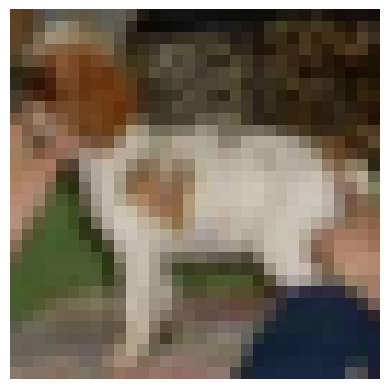

In [13]:
show_image(plt, test_x[chosen_index])

In [14]:
i = 0
count = 0
while not test_y[i]:
    i += 1
prob = probability(model, test_x[i])
prob

1/1 [==============================] - 0s 21ms/step


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.3528896 , 0.64711034]], dtype=float32)>

In [15]:
test_y[i]

1

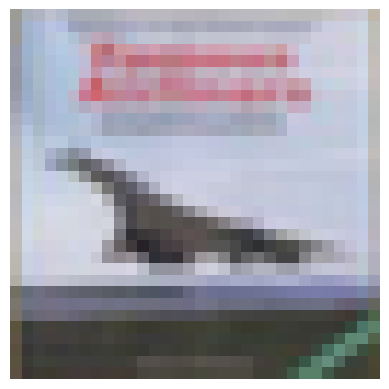

In [16]:
show_image(plt, test_x[i])

In [65]:
from PIL import Image
from urllib.request import urlopen

def evaluate_image(model, url):
    img = Image.open(urlopen(url))
    img_resized = np.asarray(img.resize((32, 32)))
    
    prob = np.array(probability(model, img_resized)).reshape(2,)

    show_image(plt, img_resized)

    if prob[0] > 0.5:
        print("This image is most likely not a plane with {:.2f} percent confidence.".format(prob[0]*100))
    else:
        print("This image is most likely a plane with {:.2f} percent confidence.".format(prob[1]*100))
    

1/1 [==============================] - 0s 20ms/step
This image is most likely a plane with 99.79 percent confidence.


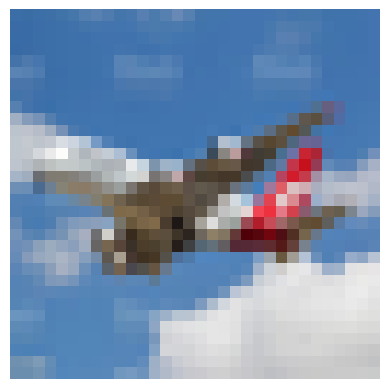

In [66]:
evaluate_image(model, "https://media.istockphoto.com/id/501147980/es/foto/qantas-airways-airbus-a380-vh-oqf-despegar.webp?s=612x612&w=is&k=20&c=G0_4dlCUzEatl6ytQ7yOjzU2zn0HL6_XQ3_WaF2Jmzk=")